<a href="https://colab.research.google.com/github/RATHAN9339/Project_1/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

Read the Dataset

In [17]:
df=pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
#Check for null and duplicate values
print("Null Values in the Dataset:",df.isnull().sum().sum())
print("Duplicate Values in the Dataset:",df.duplicated().sum())

Null Values in the Dataset: 0
Duplicate Values in the Dataset: 0


Drop Irrelevant Columns

In [19]:
df.drop(columns=['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], inplace=True)

Encode Categorical Columns

In [20]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

Split Features and Target

In [21]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

Split Training and Testing Data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Apply SMOTE

In [23]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

Standardize Features

In [26]:
scaler=StandardScaler()
x_resampled=scaler.fit_transform(x_resampled)
x_test=scaler.transform(x_test)

Logistic Regression

In [29]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

Prediction

In [31]:
y_pred = model.predict(x_test)

In [32]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[216  39]
 [ 18  21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       255
           1       0.35      0.54      0.42        39

    accuracy                           0.81       294
   macro avg       0.64      0.69      0.65       294
weighted avg       0.85      0.81      0.82       294



,Feature,Coefficient
22,StockOptionLevel,-0.841594
26,YearsAtCompany,0.793223
10,JobInvolvement,-0.632913
27,YearsInCurrentRole,-0.628795
13,JobSatisfaction,-0.618210
7,EnvironmentSatisfaction,-0.586981
18,OverTime,0.547274
11,JobLevel,-0.543392
25,WorkLifeBalance,-0.534462
29,YearsWithCurrManager,-0.492348


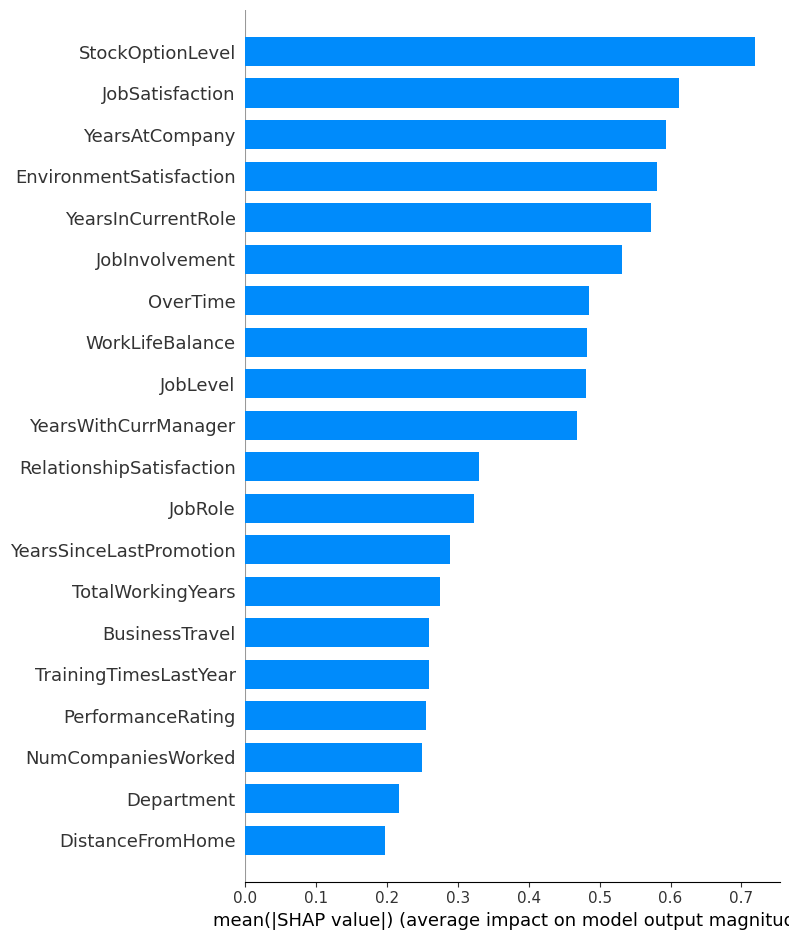

In [46]:
import shap

explainer = shap.Explainer(model, x_resampled)
shap_values = explainer(x_test)

feature_names = X.columns

predictions_df = pd.DataFrame(x_test, columns=feature_names)
predictions_df['Actual_Attrition'] = y_test.values
predictions_df['Predicted_Attrition'] = y_pred

# Export to CSV
predictions_df.to_csv("attrition_predictions.csv", index=False)

# Visualize SHAP summary
plt.figure()


shap.summary_plot(shap_values, features=x_test, feature_names=feature_names, plot_type="bar", show=False)
plt.tight_layout()

# Visualize coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)


coefficients.head(15)
